<a href="https://colab.research.google.com/github/iopsych1975/iopsych1975/blob/main/BEHR_Cluster_of_Sentence_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers
!pip install pandas
!pip install sklearn
!pip install texthero
!pip install tbb
!pip install hdbscan
!pip install umap-learn

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
from sentence_transformers import SentenceTransformer, models
#model = SentenceTransformer('distilbert-base-nli-mean-tokens')
model = SentenceTransformer('paraphrase-mpnet-base-v2', device='cuda:0')
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import hdbscan
import texthero


In [4]:
model.max_seq_length = 512
print (model.max_seq_length)

512


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/behr_short.csv')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Appreciation_Short.csv')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Appreciation Comments.csv')
#df = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Appreciation_Short.xlsx').parse()


In [6]:
embeddings = model.encode(df['Text'])
#use = np.array(embeddings).tolist()
#df['use']=[v for v in use]

In [7]:
df

,SURVEY_EVENT_ID,SURVEY_RESPONDER_ID,QUESTION_TEXT,Text,SURVEY_QUESTION_ESSENCE_NAME,SURVEY_QUESTION_CONDITION_TYPE_DESCRIPTION,IS_CORE_STATEMENT,use
0,89100,13633245,What gets in the way of you feeling genuinely ...,is an excellent company. There are situations...,Appreciation (-),Agreement (0-6) < 5 (Agree),True,"[-0.0017075254581868649, -0.016932664439082146..."
1,89100,13633301,What gets in the way of you feeling genuinely ...,I feel that there are no obstacles.,Appreciation (-),Agreement (0-6) < 5 (Agree),True,"[-0.16571345925331116, 0.2683608829975128, -0...."
2,89100,13633313,What gets in the way of you feeling genuinely ...,only the rewards that my customers give me,Appreciation (-),Agreement (0-6) < 5 (Agree),True,"[0.051149606704711914, 0.1374177187681198, -0...."
3,89100,13633347,What gets in the way of you feeling genuinely ...,the trust,Appreciation (-),Agreement (0-6) < 5 (Agree),True,"[0.08413109183311462, 0.24992656707763672, -0...."
4,89100,13633359,What gets in the way of you feeling genuinely ...,that everyone is very kind to each other and e...,Appreciation (-),Agreement (0-6) < 5 (Agree),True,"[-0.009683913551270962, -0.01461831945925951, ..."
...,...,...,...,...,...,...,...,...
3285,89100,13636132,What contributes most to you wanting to stay w...,It a family friendly work environment.,Retention (+),Agreement (0-6) < 2 (Slightly Disagree),True,"[-0.16153275966644287, -0.0835602805018425, -0..."
3286,89100,13636135,What contributes most to you wanting to stay w...,The opportunity to further my career,Retention (+),Agreement (0-6) < 2 (Slightly Disagree),True,"[-0.040170490741729736, 0.28966400027275085, -..."
3287,89100,13636146,What contributes most to you wanting to stay w...,My mortgage.,Retention (+),Agreement (0-6) < 2 (Slightly Disagree),True,"[-0.154686838388443, 0.14169447124004364, 0.00..."
3288,89100,13636158,What contributes most to you wanting to stay w...,THAT PEOPLE COME FIRST,Retention (+),Agreement (0-6) < 2 (Slightly Disagree),True,"[0.05211659148335457, 0.1314961165189743, 0.03..."


In [ ]:
umap_embeddings = umap.UMAP(n_neighbors=4, 
                            n_components=2,
                            min_dist=0.0, 
                            metric='cosine').fit_transform(embeddings)
cluster = hdbscan.HDBSCAN(min_cluster_size=20,
                          min_samples = 20,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
# Prepare data

result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_
df['labels'] = pd.Series(result['labels'])





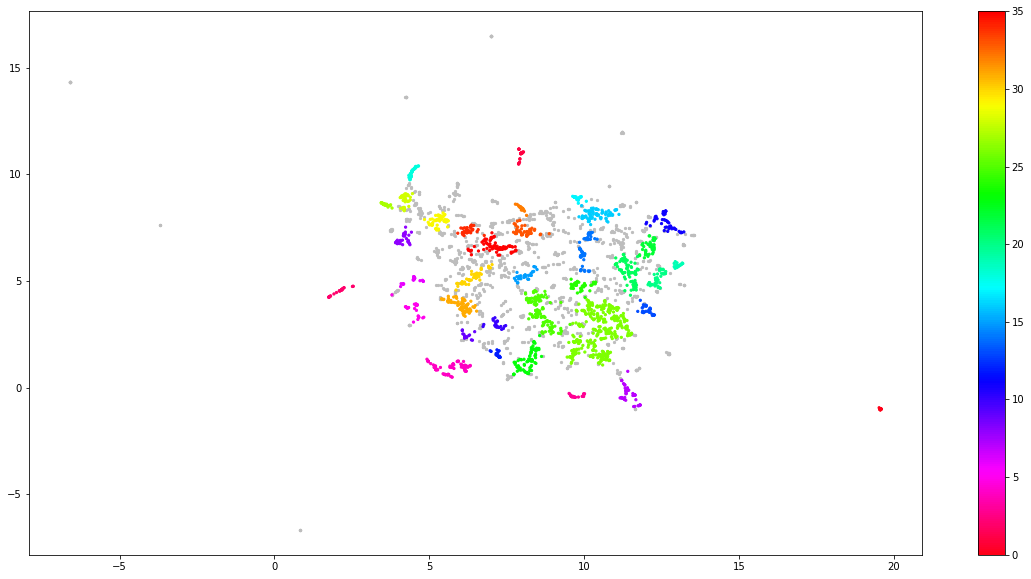

In [ ]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
plt.colorbar()

In [ ]:
df.to_excel(r'/content/drive/MyDrive/Colab Notebooks/behr_short_report_5.xlsx', index=False)

In [ ]:
result

,x,y,labels
0,5.894631,6.740524,63
1,9.121812,11.165879,3
2,8.891836,5.113054,81
3,10.557729,6.775176,-1
4,10.277396,7.285459,67
...,...,...,...
3285,8.390199,4.591365,-1
3286,6.862681,4.147002,16
3287,3.681524,5.360908,6
3288,10.488564,7.360679,67


In [ ]:
import texthero

In [ ]:
texthero.scatterplot(df, )

TypeError: ignored